# Plotting the decision boundary

**Author**: Umberto Michelucci, um@udata.science [udata.science](udata.science)

In this notebook I give some examples on how to plot the decision boundary (when in two dimensions) to visualise the classification algorithm results. It is a nice way to visually show what is happening. And for example is a nice way to give a visual reasoning about variance and bias. More on that later.

Let's first import some data to be able to have something to plot. Let's use the iris dataset.

In [168]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import datasets, svm
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier

# Helper Functions

In [161]:
def make_mesh_predict(h, c1, clf):
    """
    Inputs:
    h -> mesh step (0.001 is a good value of you move between 0 and 1)
    c -> Your training data
    clf -> Your classifier
    
    Outputs:
    xx -> x values of the mesh
    yy -> y values of the mesh
    Z -> The prediction (the color of each point)
    """
    
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = c1[:, 0].min() - .2, c1[:, 0].max() + .2
    y_min, y_max = c1[:, 1].min() - .2, c1[:, 1].max() + .2
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    Z = Z.reshape(xx.shape)
    
    return xx, yy, Z

In [213]:
def print_decision_boundary(xx, yy, Z, X, Y):
    """
    Inputs:
    xx: the values for the mesh (coming from make_mesh_predict())
    yy: the values for the mesh (coming from make_mesh_predict())
    Z: the prediction for each point (that will be mapped to the color)
    X,Y: the training points
    """
    plt.figure(1, figsize=(9, 7))
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired, s= 30)
    plt.xlabel('X1')
    plt.ylabel('X2')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

    plt.show()

# An example with the iris data set

Code has been inspired (and sometimes copied) from the sklearn documentation.

In [194]:
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

Let's try with a logistic regression (that will give linear boundaries)

In [195]:
logreg = linear_model.LogisticRegression(C=1e5)
logreg.fit(X, Y)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

Now we need to create the mesh (simply a set of tuples for all the points we want to plot). The variable Z will contain the color of each point. We will use Z to choose the color for the points.

In [205]:
xx, yy, Z = make_mesh_predict(.02, X, logreg)

Now we will use ```pcolormesh()``` to plot the background (or the decision boundary) and ```scatter()``` to plot the points.

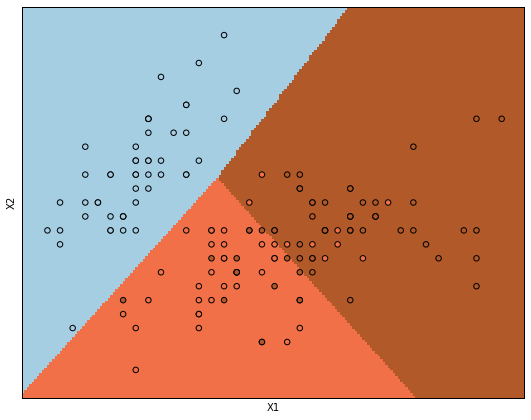

In [212]:
#Z = Z.reshape(xx.shape)

print_decision_boundary(xx, yy, Z, X, Y)

# Bidimensional example

Let's create some fake data.

In [150]:
nobs = 30

xx1 = np.array([np.random.normal(0.3,0.15) for i in range (0,nobs)])
yy1 = np.array([np.random.normal(0.3,0.15) for i in range (0,nobs)])
xx2 = np.array([np.random.normal(0.6,0.1) for i in range (0,nobs)])
yy2 = np.array([np.random.normal(0.3,0.1) for i in range (0,nobs)])

c1_ = np.c_[xx1.ravel(), yy1.ravel()]
c2_ = np.c_[xx2.ravel(), yy2.ravel()] 

c = np.concatenate([c1_,c2_])

# Now let's create the labels

yy1_ = np.full(nobs, 0, dtype=int)
yy2_ = np.full(nobs, 1, dtype=int)
yyL = np.concatenate((yy1_, yy2_), axis = 0)

## Helper functions

## Some examples of classifiers

Here is a linear classifier (logistic regression).

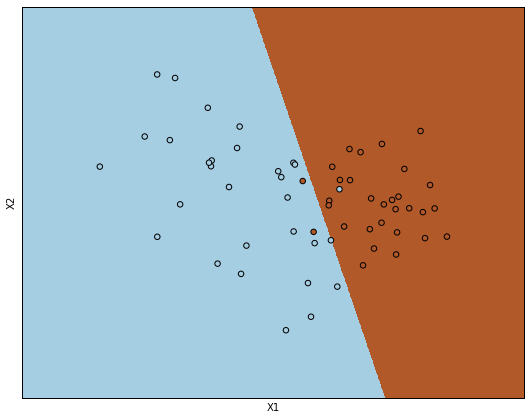

In [214]:
logreg2 = linear_model.LogisticRegression(C=1e5)
logreg2.fit(c, yyL)

xx, yy, Z = make_mesh_predict(0.001, c, logreg2)

print_decision_boundary(xx, yy, Z, c, yyL)


If we try nearest neighbors (checking 3 NN) we get a non linear boundary.

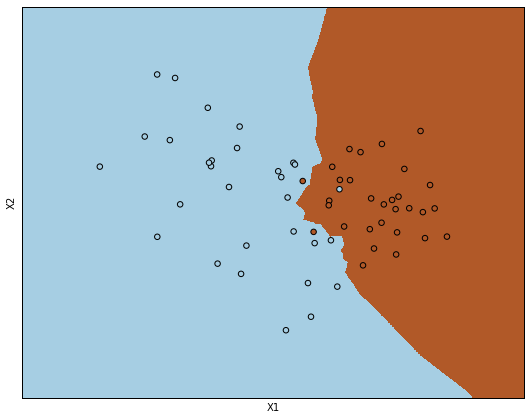

In [215]:
KN = KNeighborsClassifier(n_neighbors=3)
KN.fit(c, yyL)

xx, yy, Z = make_mesh_predict(0.001, c, KN)

print_decision_boundary(xx, yy, Z, c, yyL)
